# Workshop: Recommender Systems

<div>
<img src="https://developer-blogs.nvidia.com/wp-content/uploads/2021/04/Whats-recommendation-system_Pic-2.png" width="590"/> 
<img src="https://developer-blogs.nvidia.com/wp-content/uploads/2021/04/whats-recommendation_Pic0.png" width="500"/>
</div>


Image sources: https://www.nvidia.com/en-us/glossary/data-science/recommendation-system/


<div>
<img src="https://storage.googleapis.com/lds-media/images/cosine-similarity-vectors.original.jpg" width="700"/> 
       
 <br>
<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/848e2bba-80ee-4352-94ed-ddbc3997b56a.png" width="300"/>
    
<br>
<img src="http://researchdatapod.com/wp-content/uploads/2021/11/Screenshot-2021-11-27-at-16.01.30-1024x354.png" width="600"/>
</div>




## Read Data

In [1]:
import pandas as pd
# Load the MovieLens dataset (you can download it from https://grouplens.org/datasets/movielens/)
# For this example, we'll use the small dataset
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
print(ratings.shape)
print(movies.shape)

(100836, 4)
(9742, 3)


## Merge movies and ratings data

In [5]:
movie_ratings = pd.merge(ratings, movies, on='movieId')
print(movie_ratings.shape)
movie_ratings.head()

(100836, 6)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Create a user-item matrix

In [6]:
user_movie_ratings = movie_ratings.pivot_table(index='userId', columns='title', values='rating')
user_movie_ratings.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


### Fill NaN values with 0 (assuming no rating means a rating of 0)

In [7]:
user_movie_ratings = user_movie_ratings.fillna(0)
user_movie_ratings.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,4.0,3.5,3.0,0.0,0.0,2.0,1.5,0.0,0.0


In [8]:
user_movie_ratings.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
           dtype='int64', name='userId', length=610)

## Calculate cosine similarity between users

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_movie_ratings)

In [10]:
user_similarity

array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [11]:
user_similarity.shape

(610, 610)

### Convert the similarity matrix into a DataFrame

In [12]:

user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_ratings.index, columns=user_movie_ratings.index)

In [13]:
user_similarity_df.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.05972,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.00000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.00000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119


## Reccommend items for a user 

In [14]:
user_id = 1

### Sort similar users based on cosine similarity 

In [15]:
similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index[1:]
similar_users

Int64Index([266, 313, 368,  57,  91, 469,  39, 288, 452,  45,
            ...
            184, 245, 358, 496, 397, 578, 506, 175, 556, 306],
           dtype='int64', name='userId', length=609)

### Define vector user_ratings of user_id

In [16]:
user_ratings = user_movie_ratings.loc[user_id]
print(user_ratings)

title
'71 (2014)                                   0.0
'Hellboy': The Seeds of Creation (2004)      0.0
'Round Midnight (1986)                       0.0
'Salem's Lot (2004)                          0.0
'Til There Was You (1997)                    0.0
                                            ... 
eXistenZ (1999)                              0.0
xXx (2002)                                   0.0
xXx: State of the Union (2005)               0.0
¡Three Amigos! (1986)                        4.0
À nous la liberté (Freedom for Us) (1931)    0.0
Name: 1, Length: 9719, dtype: float64


### Create list of top 10 reccomend moviess with the order of other similar users 

- select the movies with rating > 3 and

- user never rating (user_ratings==0)


In [17]:
recommendations = []
for other_user in similar_users:
    other_user_ratings = user_movie_ratings.loc[other_user]

    movies_rating = other_user_ratings[(other_user_ratings >3) & (user_ratings==0)]  
    movies = movies_rating.sort_values(ascending=False).index
    recommendations.extend(movies)
    if len(recommendations)>10:
        break;

recommendations[:10] 

['2001: A Space Odyssey (1968)',
 'Fisher King, The (1991)',
 'Hard-Boiled (Lat sau san taam) (1992)',
 'Aliens (1986)',
 'Hunt for Red October, The (1990)',
 'Producers, The (1968)',
 'Raising Arizona (1987)',
 'Real Genius (1985)',
 'Ref, The (1994)',
 'Roger & Me (1989)']

## Define Function for Recommendation and Write as file 

In [18]:
%%writefile myfunction_65130701726.py
# Function to get movie recommendations for a user
def get_movie_recommendations(user_id, user_similarity_df, user_movie_ratings, n_recommendations):
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index[1:]
    user_ratings = user_movie_ratings.loc[user_id]
    
    recommendations = []
    for other_user in similar_users:
        other_user_ratings = user_movie_ratings.loc[other_user]

        movies_rating = other_user_ratings[(other_user_ratings > 3) & (user_ratings == 0)]
        movies = movies_rating.sort_values(ascending=False).index
        recommendations.extend(movies)
        if len(recommendations) > n_recommendations:
            break;

    return recommendations[:n_recommendations]  # Return top n recommendations



Writing myfunction_65130701726.py


## Save Recommendation Data: user_similarity_df, user_movie_ratings

In [19]:
import pickle

# Assuming you already have user_similarity_df and user_movie_ratings defined

# Save data to a file
with open('recommendation_data_65130701726.pkl', 'wb') as file:
    data_to_save = [user_similarity_df, user_movie_ratings]
    pickle.dump(data_to_save, file)

## Import the defined function and Load Recommendation Data

Runtime - > Restart runtime 

In [1]:
from myfunction_65130701726 import get_movie_recommendations
import pickle

In [2]:
# Load data back from the file
with open('recommendation_data_65130701726.pkl', 'rb') as file:
    user_similarity_df, user_movie_ratings = pickle.load(file)

In [3]:
# Example: Get recommendations for a user
user_id = 1
recommendations = get_movie_recommendations(user_id, user_similarity_df, user_movie_ratings, 10)

print("Top 10 movie recommendations for User {user_id}:")
for movie_title in recommendations:
    print("          " + movie_title)

Top 10 movie recommendations for User {user_id}:
          2001: A Space Odyssey (1968)
          Fisher King, The (1991)
          Hard-Boiled (Lat sau san taam) (1992)
          Aliens (1986)
          Hunt for Red October, The (1990)
          Producers, The (1968)
          Raising Arizona (1987)
          Real Genius (1985)
          Ref, The (1994)
          Roger & Me (1989)


## Movie Recommendation as WebApp using Streamlit

In [4]:
%%writefile app_strl.py
from myfunction_65130701726 import get_movie_recommendations
import streamlit as st
import pandas as pd
import pickle

# Load your data
with open('recommendation_data_65130701726.pkl', 'rb') as file:
    user_similarity_df, user_movie_ratings = pickle.load(file)


# Streamlit app
def main():
    st.title("Movie Recommendation")

    # User input
    user_id = st.number_input("Enter User ID:", min_value=0, max_value=user_similarity_df.shape[0]-1, value=0)
    n_recommendations = st.slider("Number of Recommendations:", min_value=1, max_value=10, value=5)

    # Generate recommendations on button click
    if st.button("Get Recommendations"):
        if user_id in user_similarity_df.index: 
            recommendations = get_movie_recommendations(user_id, user_similarity_df, user_movie_ratings, n_recommendations)
            st.write(f"Top {n_recommendations} Movie Recommendations for User {user_id}:", recommendations)
        else: 
            st.write(f" Movie Recommendations for User {user_id}: is not available.")

if __name__ == '__main__':
    main()


Writing app_strl.py


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://docs.streamlit.io/library/api-reference

https://github.com/



In [5]:
%%writefile requirements.txt

scikit-learn==1.2.2
pandas
 

Writing requirements.txt


# SVD  for recommender systems

<div>

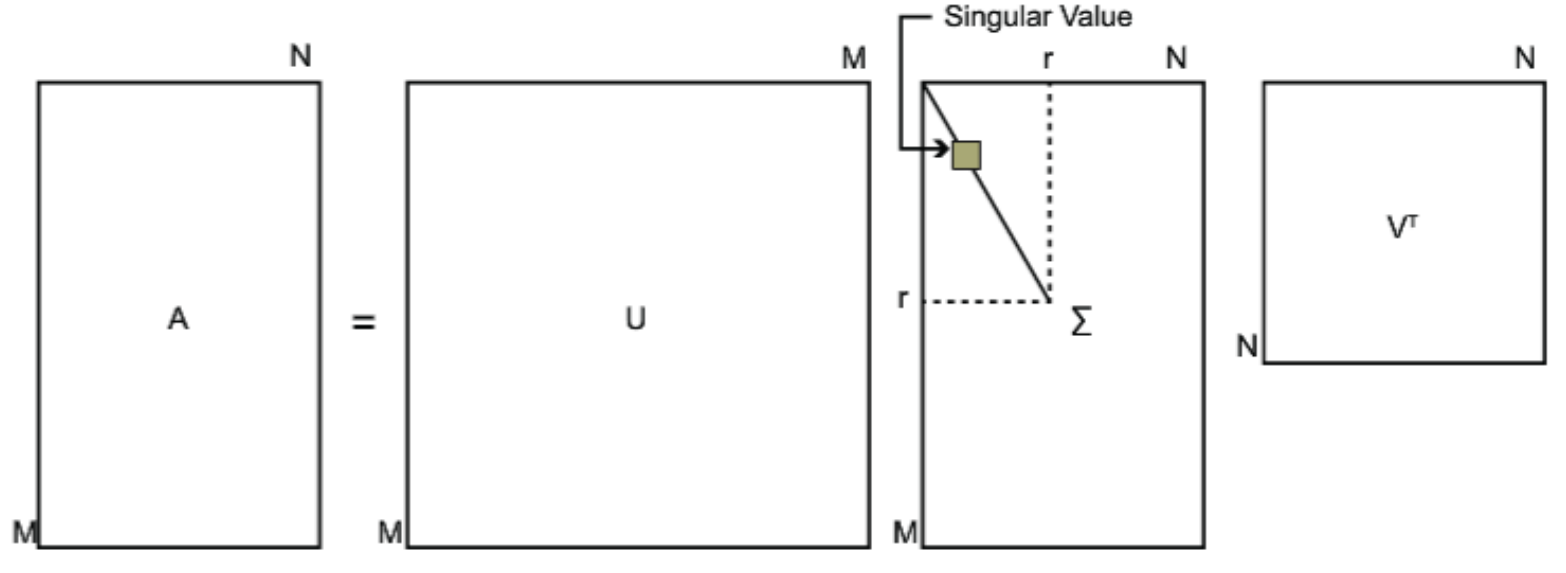 
 <br>
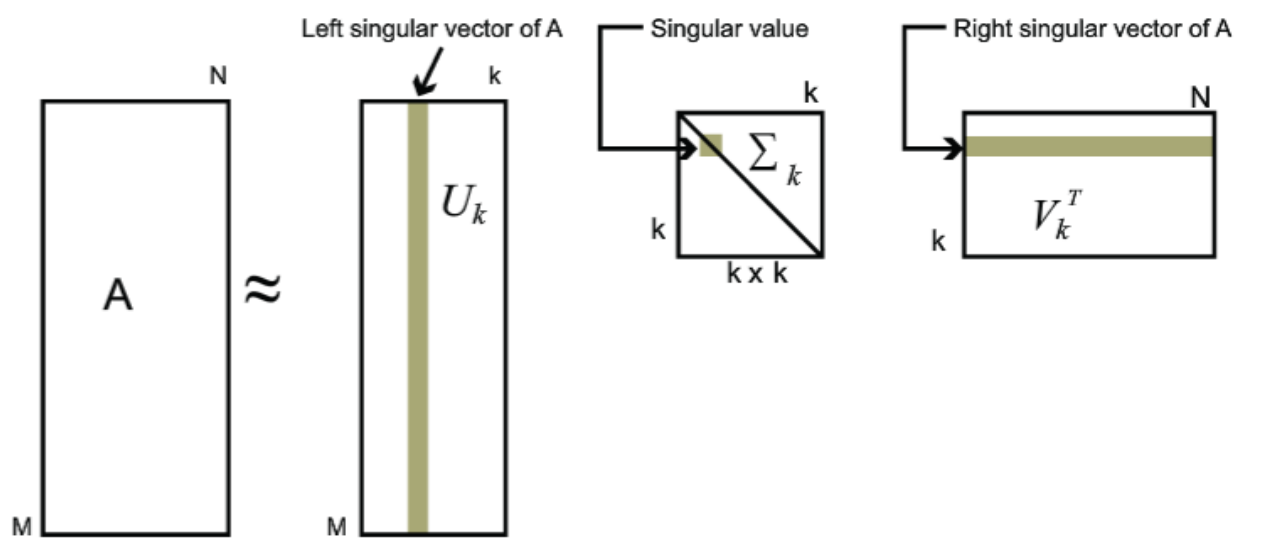 

    
</div>



<div>
<img src="https://eugeneyan.com/assets/og_image/matrix-factorization.jpg" width="700"/> 
 <br>
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*b4M7o7W8bfRRxdMxtFoVBQ.png" width="700"/> 
    
</div>

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy

# Load the MovieLens dataset (ml-latest-small)
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

# Merge movies and ratings data
movie_ratings = pd.merge(ratings, movies, on='movieId')

# Create a Surprise Reader
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise Dataset
data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use the SVD algorithm
svd = SVD()

# Train the algorithm on the training set
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Evaluate the predictions using RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
print(f"RMSE on the test set: {rmse}")

# Get recommendations for a specific user
user_id = 1
user_movies = movie_ratings[movie_ratings['userId'] == user_id]['movieId'].unique()

# Filter out movies the user has already rated
unrated_movies = movies[~movies['movieId'].isin(user_movies)]['movieId']

# Make predictions for unrated movies
user_predictions = [svd.predict(user_id, movie_id) for movie_id in unrated_movies]

# Sort predictions by estimated rating in descending order
sorted_predictions = sorted(user_predictions, key=lambda x: x.est, reverse=True)

# Get top 10 movie recommendations
top_recommendations = sorted_predictions[:10]

# Print top recommendations
print(f"\nTop 10 movie recommendations for User {user_id}:")
for recommendation in top_recommendations:
    movie_title = movies[movies['movieId'] == recommendation.iid]['title'].values[0]
    print(f"{movie_title} (Estimated Rating: {recommendation.est})")


In [ ]:
svd.pu.shape

In [ ]:
svd.qi.shape